In [1]:
# This notebook wil explore the dataset containing information on accredited Renewable Energy Target power stations
# That were accredited and installed from 2001 to 2022
# The dataset was provided by the Clean Energy Regulator (CER)
# Link to the dataset: https://www.cleanenergyregulator.gov.au/RET/About-the-Renewable-Energy-Target/Large-scale-Renewable-Energy-Target-market-data/large-scale-renewable-energy-target-supply-data/historical-large-scale-renewable-energy-target-supply-data#accredited-power-stations-data

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Initial data frame
initial_df = pd.read_csv("datasets/historical_data_power_stations.csv", encoding='ISO-8859-1')

In [6]:
# First look at the initial data frame
initial_df

,Accreditation code,Power station name,State,Installed capacity,Postcode,Fuel source(s),Accreditation start date,Suspension status,Baseline (MWh),Comment
0,BEBMNS02,Bayswater Power Station,NSW,0.0000,2333,Biomass,1/04/2001,Unsuspended,0,The capacity for this power station is not cou...
1,BEBMNS01,Liddell Power Station,NSW,0.0000,2333,Biomass,1/04/2001,Unsuspended,0,The capacity for this power station is not cou...
2,BEBMQL27,Gladstone Power Station,QLD,0.0000,4680,Biomass,6/05/2005,Unsuspended,0,The capacity for this power station is not cou...
3,BEBMVC01,Hazelwood,VIC,0.0000,3840,Biomass,4/05/2005,Suspended,0,The capacity for this power station is not cou...
4,BEBMNS08,Mt Piper Power Station,NSW,0.0000,2847,Biomass,16/05/2002,Unsuspended,0,The capacity for this power station is not cou...
...,...,...,...,...,...,...,...,...,...,...
2157,SRPXNS94,New England Solar Farm - NSW,NSW,522.3953,2358,Solar,15/09/2022,Unsuspended,0,NaN
2158,WD00VC39,Stockyard Hill - Wind - VIC,VIC,531.9300,3373,Wind,28/04/2020,Unsuspended,0,NaN
2159,HY00NS10,Murray 2,NSW,625.0000,2642,Hydro,1/04/2001,Unsuspended,722496,This power station was generating electricity ...
2160,HY00NS09,Murray 1,NSW,950.0000,2642,Hydro,1/04/2001,Unsuspended,1319577,This power station was generating electricity ...


In [7]:
# Lets look at the data types in each column
print(initial_df.dtypes)

Accreditation code           object
Power station name           object
State                        object
Installed capacity          float64
Postcode                      int64
Fuel source(s)               object
Accreditation start date     object
Suspension status            object
Baseline (MWh)                int64
Comment                      object
dtype: object


In [9]:
# For an initial visualisation, lets use Accreditation code plotted against start date
# Lets convert start date into date time format

initial_df['Accreditation start date'] = pd.to_datetime(initial_df['Accreditation start date'], errors='coerce', dayfirst=True)

initial_df

,Accreditation code,Power station name,State,Installed capacity,Postcode,Fuel source(s),Accreditation start date,Suspension status,Baseline (MWh),Comment
0,BEBMNS02,Bayswater Power Station,NSW,0.0000,2333,Biomass,2001-04-01,Unsuspended,0,The capacity for this power station is not cou...
1,BEBMNS01,Liddell Power Station,NSW,0.0000,2333,Biomass,2001-04-01,Unsuspended,0,The capacity for this power station is not cou...
2,BEBMQL27,Gladstone Power Station,QLD,0.0000,4680,Biomass,2005-05-06,Unsuspended,0,The capacity for this power station is not cou...
3,BEBMVC01,Hazelwood,VIC,0.0000,3840,Biomass,2005-05-04,Suspended,0,The capacity for this power station is not cou...
4,BEBMNS08,Mt Piper Power Station,NSW,0.0000,2847,Biomass,2002-05-16,Unsuspended,0,The capacity for this power station is not cou...
...,...,...,...,...,...,...,...,...,...,...
2157,SRPXNS94,New England Solar Farm - NSW,NSW,522.3953,2358,Solar,2022-09-15,Unsuspended,0,NaN
2158,WD00VC39,Stockyard Hill - Wind - VIC,VIC,531.9300,3373,Wind,2020-04-28,Unsuspended,0,NaN
2159,HY00NS10,Murray 2,NSW,625.0000,2642,Hydro,2001-04-01,Unsuspended,722496,This power station was generating electricity ...
2160,HY00NS09,Murray 1,NSW,950.0000,2642,Hydro,2001-04-01,Unsuspended,1319577,This power station was generating electricity ...


In [11]:
# Now lets create a sub data frame with only the codes and dates

df_code_date = initial_df[["Accreditation code","Accreditation start date"]]

df_code_date

,Accreditation code,Accreditation start date
0,BEBMNS02,2001-04-01
1,BEBMNS01,2001-04-01
2,BEBMQL27,2005-05-06
3,BEBMVC01,2005-05-04
4,BEBMNS08,2002-05-16
...,...,...
2157,SRPXNS94,2022-09-15
2158,WD00VC39,2020-04-28
2159,HY00NS10,2001-04-01
2160,HY00NS09,2001-04-01


In [13]:
# Lets now sort this by chronological order

df_code_date = df_code_date.sort_values(by='Accreditation start date', ascending=True)

df_code_date

,Accreditation code,Accreditation start date
0,BEBMNS02,2001-04-01
1786,HYMINS02,2001-04-01
1796,BEBGVC02,2001-04-01
1813,BEBGVC01,2001-04-01
1837,HYMIQL01,2001-04-01
...,...,...
883,SRPXNSC1,2022-12-06
882,SRPXNSC2,2022-12-06
1205,SRPXNSC0,2022-12-06
1544,BEBGQL35,2022-12-21


In [17]:
# Lets visualise the number of stations, given by the accredition codes were operational per date

# First we need to have a count of stations per date
date_counts = df_code_date.groupby('Accreditation start date').size()

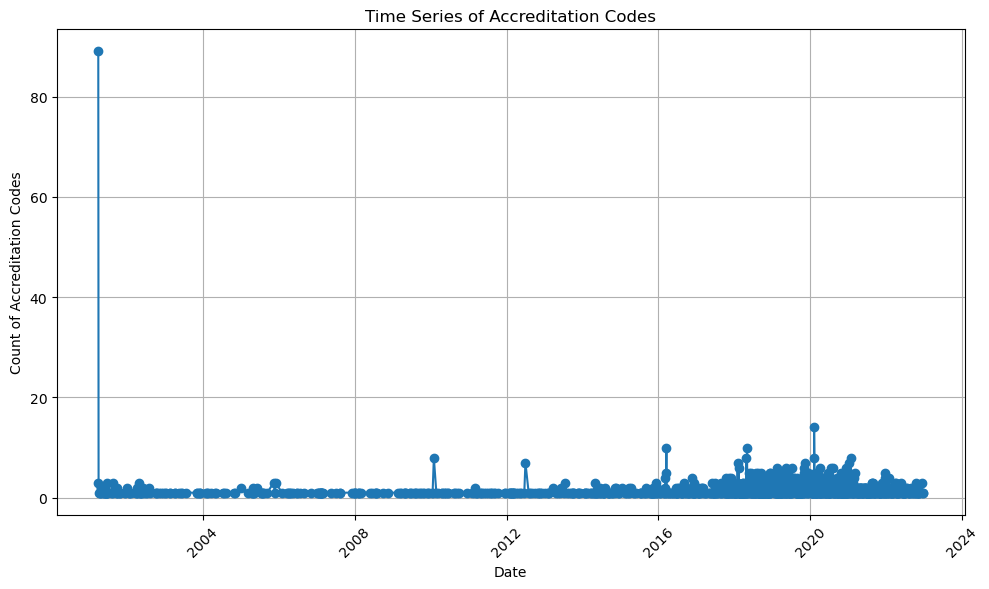

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.title('Time Series of Accreditation Codes')
plt.xlabel('Date')
plt.ylabel('Count of Accreditation Codes')
plt.grid(True)
plt.xticks(rotation=45)                                        # Rotating x-axis labels for better readability
plt.tight_layout()                                             # Adjust the plot to ensure everything fits without overlapping

plt.show()